In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

# 路径到你的tfevents文件
tfevents_path = './results_tf/sft_events.out.tfevents.1707626760.ip-172-31-67-197'

# 初始化EventAccumulator
event_acc = EventAccumulator(tfevents_path)
event_acc.Reload() # 加载事件文件

# 获取所有可用的标签
tags = event_acc.Tags()['scalars']

# 假设我们对第一个标签感兴趣，这里列出所有标签以供选择
tags


['train/loss',
 'train/learning_rate',
 'train/epoch',
 'eval/loss',
 'eval/accuracy',
 'eval/runtime',
 'eval/samples_per_second',
 'eval/steps_per_second',
 'train/train_runtime',
 'train/train_samples_per_second',
 'train/train_steps_per_second',
 'train/total_flos',
 'train/train_loss']

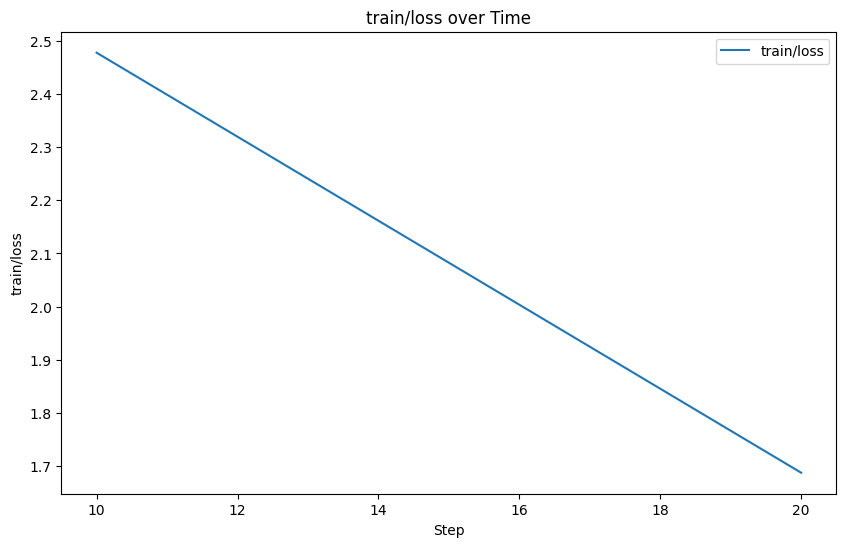

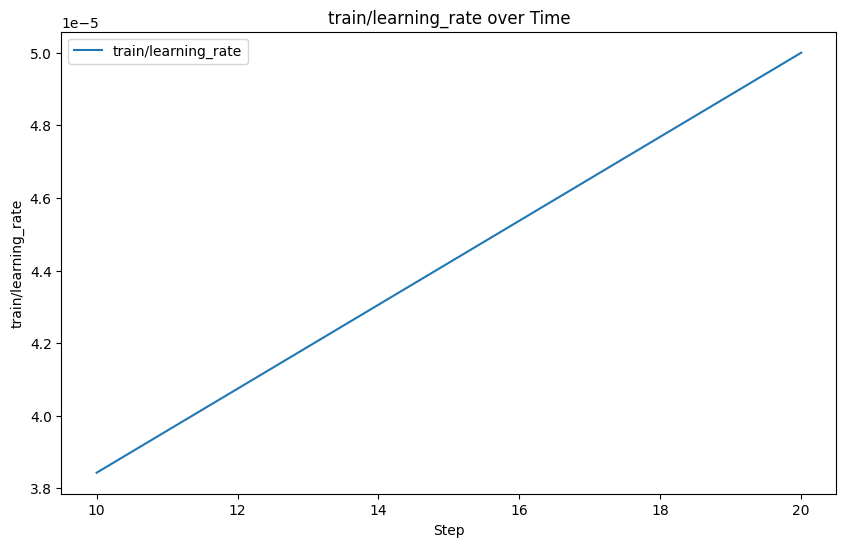

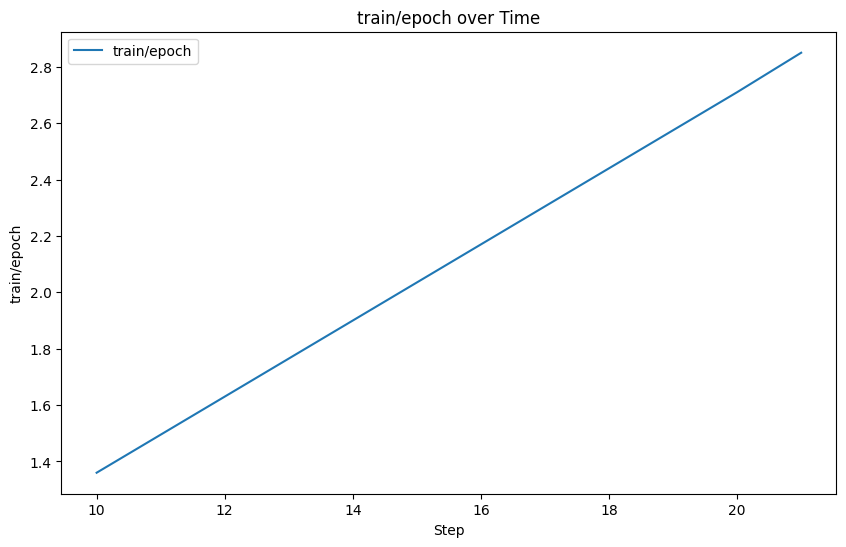

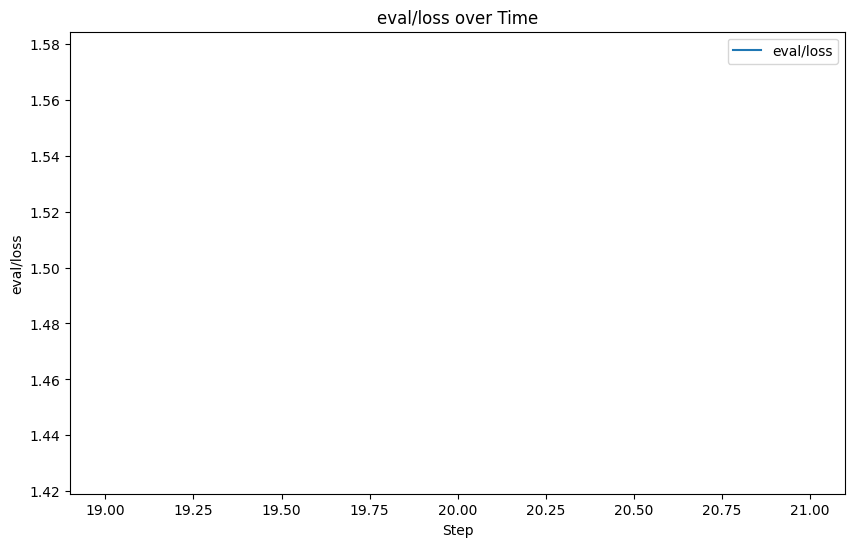

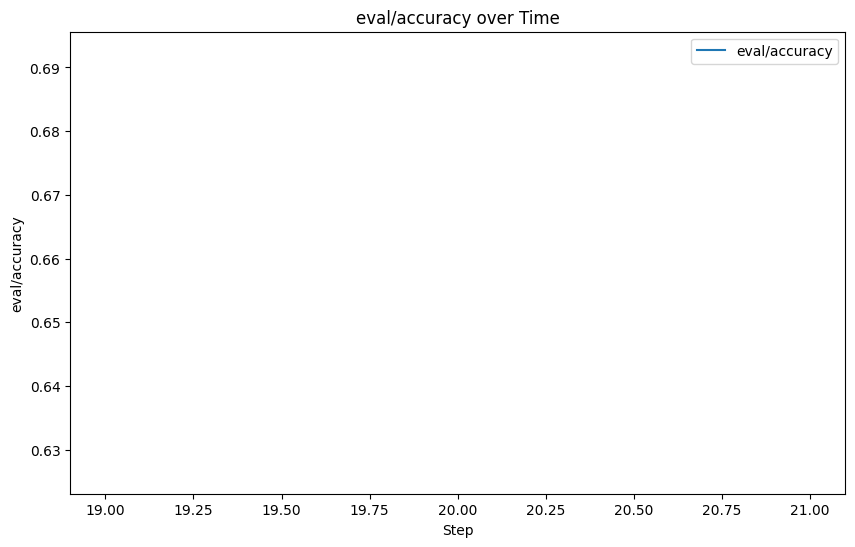

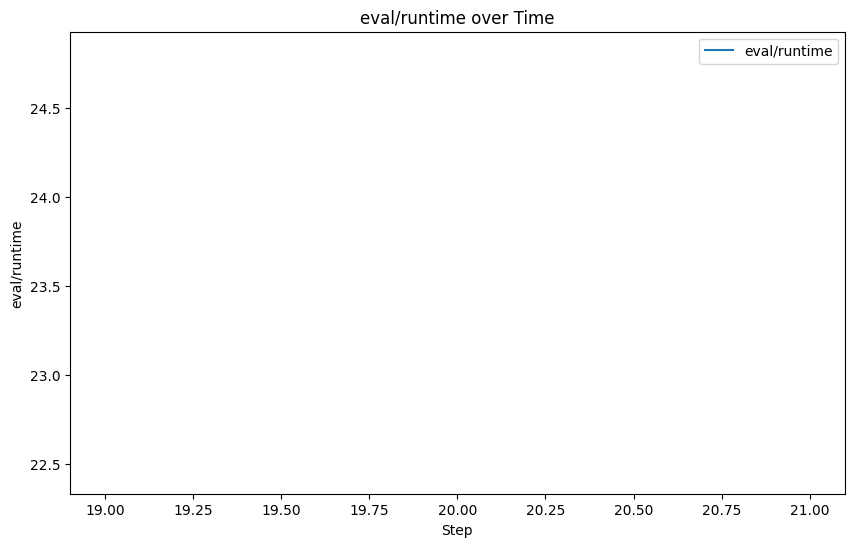

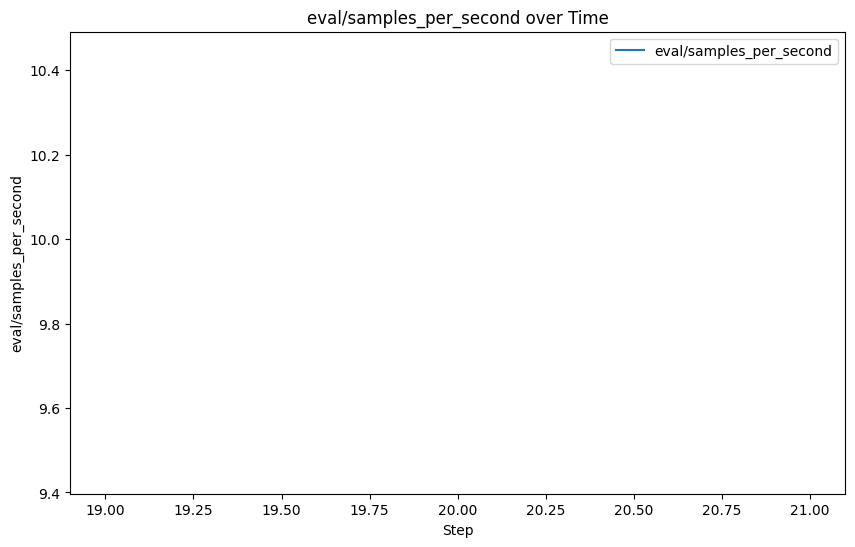

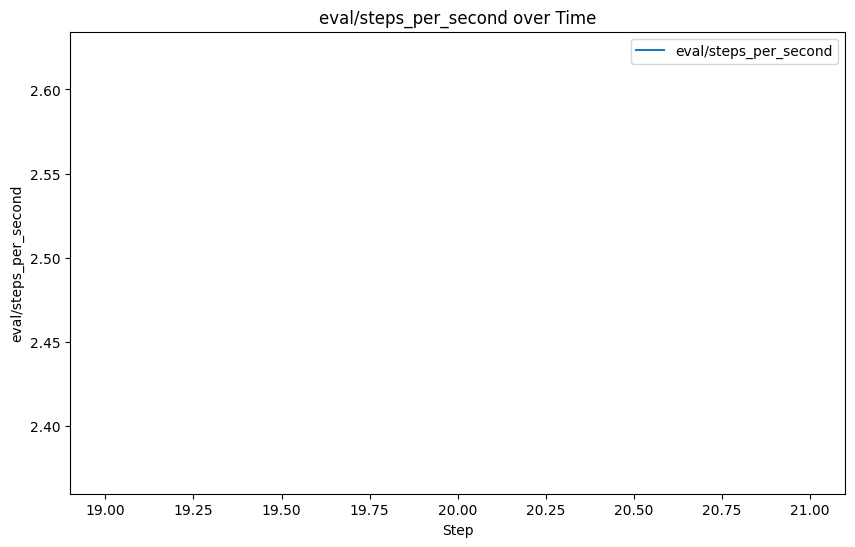

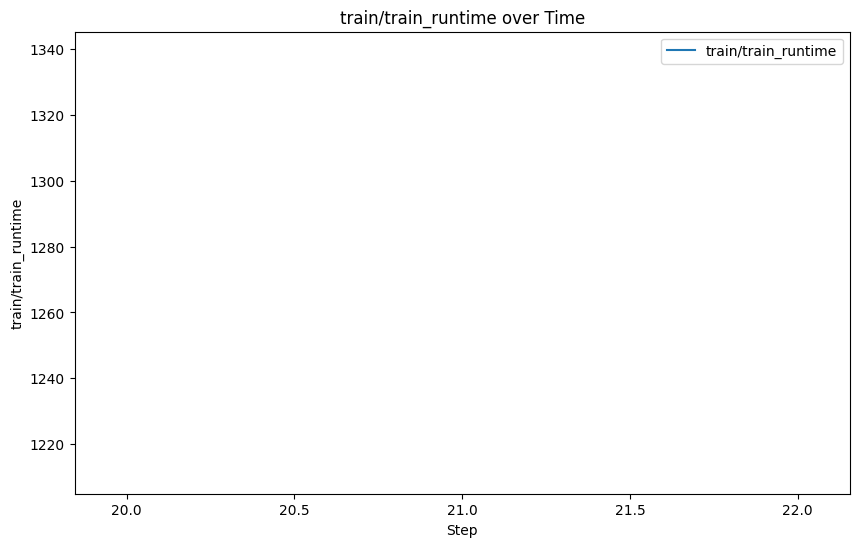

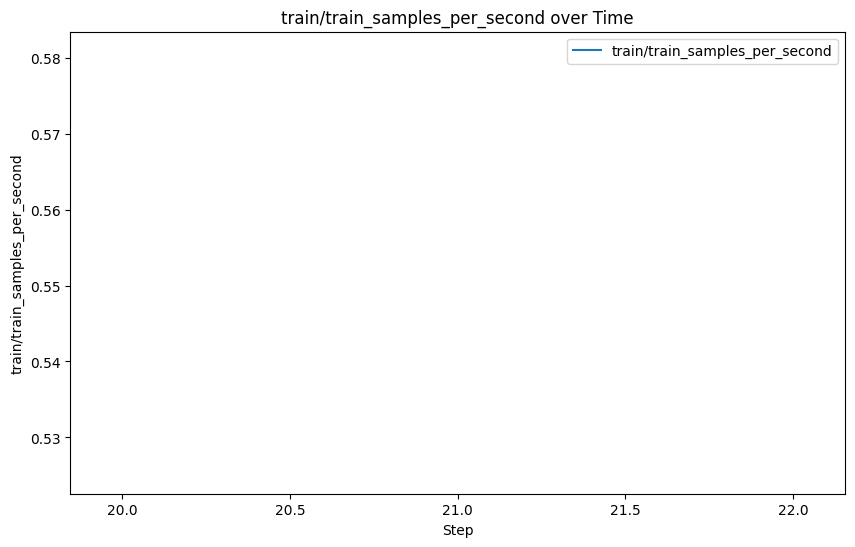

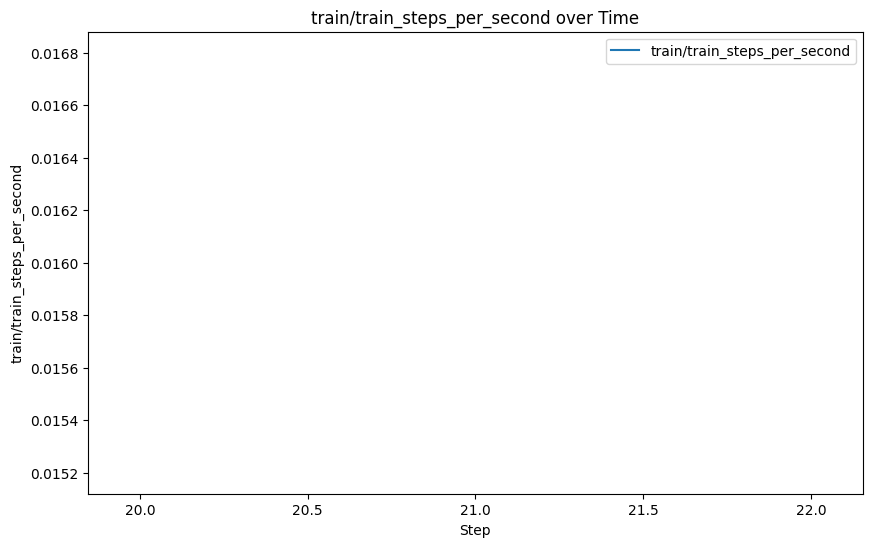

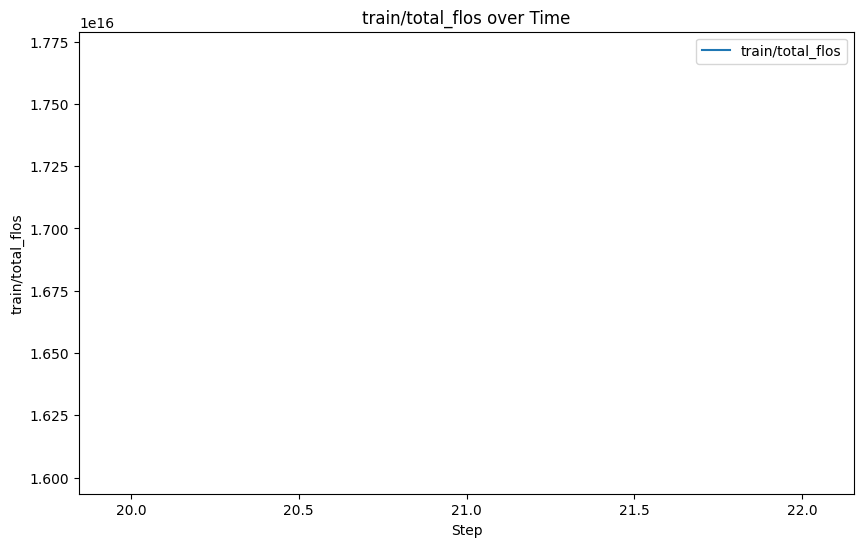

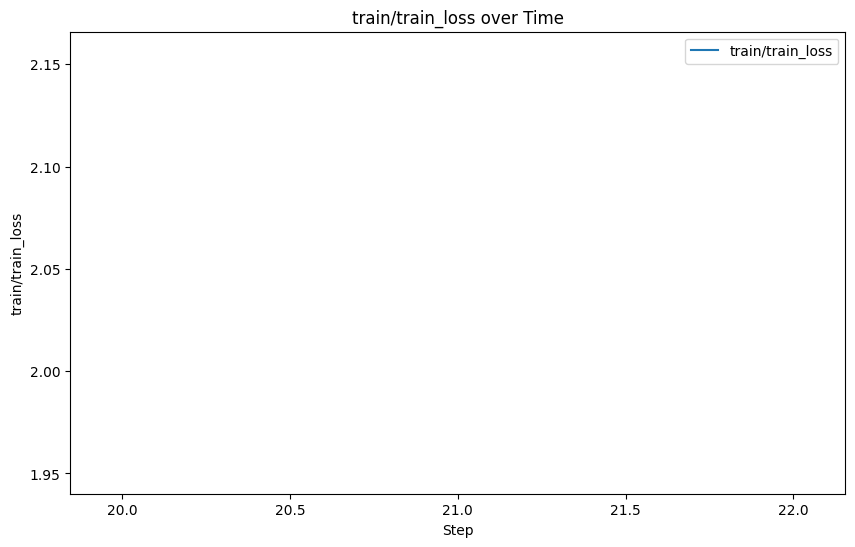

In [2]:
# 为每个标签绘制图表
for tag in tags:
    # 提取特定标签的数据
    values = event_acc.Scalars(tag)
    # print(values)
    # 分解时间步和值
    steps = [v.step for v in values]
    val = [v.value for v in values]
    
    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(steps, val, label=tag)
    plt.xlabel('Step')
    plt.ylabel(tag)
    plt.title(f'{tag} over Time')
    plt.legend()
    plt.show()